# Data analysis with Python

## Software Carpentries Workshop - 25 Jan 2022

### Load in the data

In [1]:
import numpy as np

In [2]:
my_data = np.loadtxt("data/inflammation-01.csv", delimiter=',')

### Data type and shape

In [3]:
print(my_data)
print(my_data.dtype)
print(np.shape(my_data))

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]
float64
(60, 40)


### Mean value for a subset of data

In [4]:
mean_patient = np.mean(my_data, axis = 1)
mean_day = np.mean(my_data, axis = 0)

print(mean_patient.shape)
print(mean_day.shape)

(60,)
(40,)


### Sorting out references

In [5]:
first, second = 'Grace', 'Hopper'
third, fourth = second, first
print(third, fourth)

Hopper Grace


### Change in inflammation

In [6]:
my_diff = np.diff(my_data, axis = 1)
print(my_diff.shape)

(60, 39)


#### Largest inflammation change in each patient

In [7]:
largest_change = np.amax(np.abs(my_diff), axis = 1)
print(largest_change)
# print('Number of patients: {}'.format(largest_change.shape))

[12. 14. 11. 13. 11. 13. 10. 12. 10. 10. 10. 12. 13. 10. 11. 10. 12. 13.
  9. 10. 13.  9. 12.  9. 12. 11. 10. 13.  9. 13. 11. 11.  8. 11. 12. 13.
  9. 10. 13. 11. 11. 13. 11. 13. 13. 10.  9. 10. 10.  9.  9. 13. 10.  9.
 10. 11. 13. 10. 10. 12.]


## Visualising data

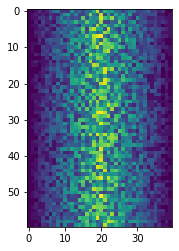

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imshow(my_data)

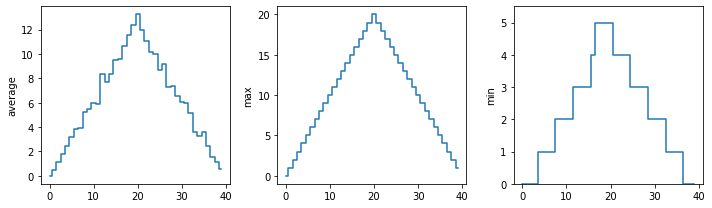

In [9]:
fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(my_data, axis=0), drawstyle='steps-mid')

axes2.set_ylabel('max')
axes2.plot(np.max(my_data, axis=0), drawstyle='steps-mid')

min_data = np.min(my_data, axis=0)
axes3.set_ylabel('min')
axes3.set_ylim(np.min(min_data), np.max(min_data) * 1.1)

axes3.plot(np.min(my_data, axis=0), drawstyle='steps-mid')

fig.tight_layout()

plt.show()

### Make your own plot

In [10]:
my_sd = np.std(my_data, axis=0)
# print(my_sd.shape)

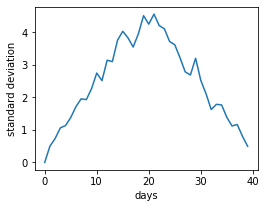

In [11]:
fig2 = plt.figure(figsize=(4.0, 3.0))

axes2a = fig2.add_subplot(1, 1, 1)

axes2a.plot(my_sd)
axes2a.set_xlabel('days')
axes2a.set_ylabel('standard deviation')

plt.show()

## Analysing data from multiple files

In [14]:
import glob

In [21]:
print(glob.glob('data/inflammation*.csv'))

['data/inflammation-08.csv', 'data/inflammation-07.csv', 'data/inflammation-01.csv', 'data/inflammation-12.csv', 'data/inflammation-10.csv', 'data/inflammation-03.csv', 'data/inflammation-02.csv', 'data/inflammation-11.csv', 'data/inflammation-04.csv', 'data/inflammation-06.csv', 'data/inflammation-05.csv', 'data/inflammation-09.csv']


data/inflammation-01.csv


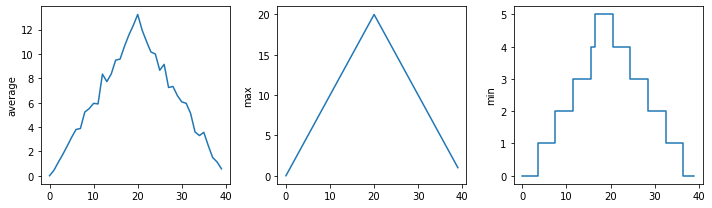

data/inflammation-02.csv


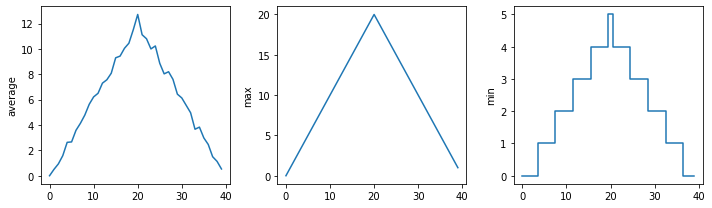

data/inflammation-03.csv


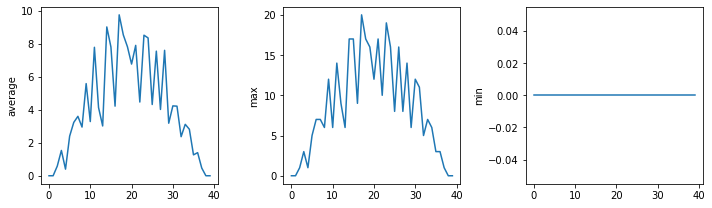

In [47]:
filenames = sorted(glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]
for f in filenames:
    print(f)

    my_data = np.loadtxt(fname=f, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(my_data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(my_data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(my_data, axis=0), drawstyle='steps-mid')

    fig.tight_layout()
    plt.show()

### Plotting differences

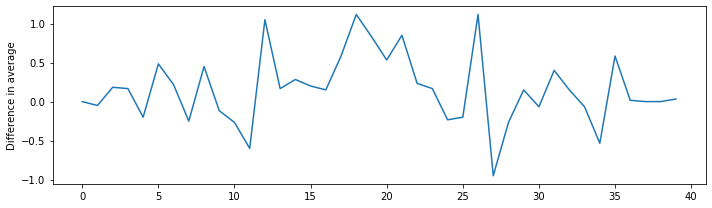

In [24]:
data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

fig = plt.figure(figsize=(10.0, 3.0))

plt.ylabel('Difference in average')
plt.plot(data0.mean(axis=0) - data1.mean(axis=0))

fig.tight_layout()
plt.show()

### Generate composite statistics

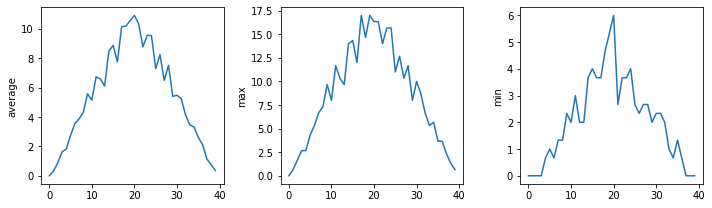

In [25]:
composite_data = np.zeros((60,40))

for f in filenames:
    data = np.loadtxt(fname = f, delimiter=',')
    composite_data += data

composite_data/=len(filenames)

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.max(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.min(composite_data, axis=0))

fig.tight_layout()

plt.show()

## Filtering data

### Checking the maxima

In [48]:
for f in filenames:
    print(f)

    my_data = np.loadtxt(fname=f, delimiter=',')
    
    data_max = np.max(my_data, axis=0)
    data_min = np.min(my_data, axis=0)
    
    count = 0
    for i in range(0,21):
        if data_max[i] != count:
            print('Suspicious looking maxima on day {}'.format(count))
        # else:
        #     print('Seems OK!')  
        count +=1
        
    if data_min.sum() == 0:
        print('Healthy patient has snuck into the study')

data/inflammation-01.csv
data/inflammation-02.csv
data/inflammation-03.csv
Suspicious looking maxima on day 1
Suspicious looking maxima on day 2
Suspicious looking maxima on day 4
Suspicious looking maxima on day 6
Suspicious looking maxima on day 8
Suspicious looking maxima on day 9
Suspicious looking maxima on day 10
Suspicious looking maxima on day 11
Suspicious looking maxima on day 12
Suspicious looking maxima on day 13
Suspicious looking maxima on day 14
Suspicious looking maxima on day 15
Suspicious looking maxima on day 16
Suspicious looking maxima on day 17
Suspicious looking maxima on day 18
Suspicious looking maxima on day 19
Suspicious looking maxima on day 20
Healthy patient has snuck into the study


Seems OK!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Seems OK!
Suspicious looking maxima!
Suspicious looking maxima!
Seems OK!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima!
Suspicious looking maxima